In [2]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import math

C:\Users\strub\anaconda3\envs\prophet39\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
number=1
file = '../airline_Train_'+str(number)+'.csv'

df = pd.read_csv(file)
df.columns = ['ds','y']
df['ds'] = pd.to_datetime(df['ds'])
df.tail()

,ds,y
55,1959-08-01,559
56,1959-09-01,463
57,1959-10-01,407
58,1959-11-01,362
59,1959-12-01,405


In [4]:
m = Prophet(seasonality_mode='multiplicative')
m.fit(df)

17:06:34 - cmdstanpy - INFO - Chain [1] start processing
17:06:34 - cmdstanpy - INFO - Chain [1] done processing


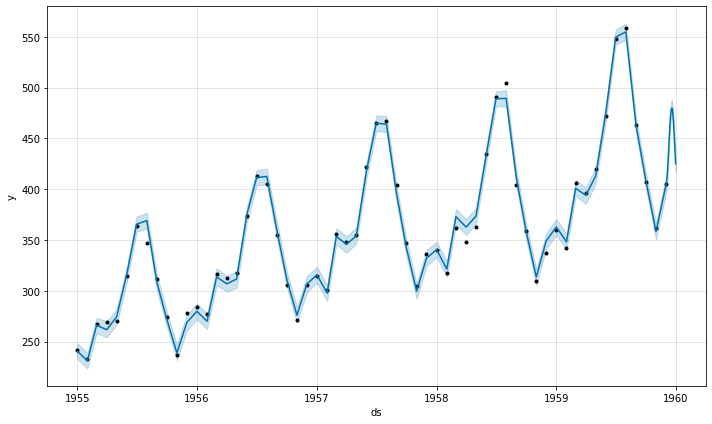

In [5]:
future = m.make_future_dataframe(periods=30, freq='D')
forecast = m.predict(future)
m.plot(forecast);

KeyError: 'yhat'

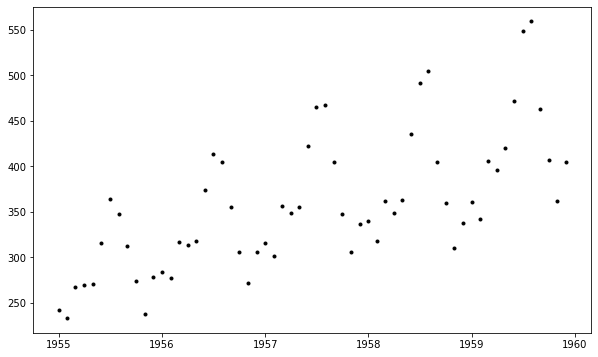

In [10]:
m.plot(df)

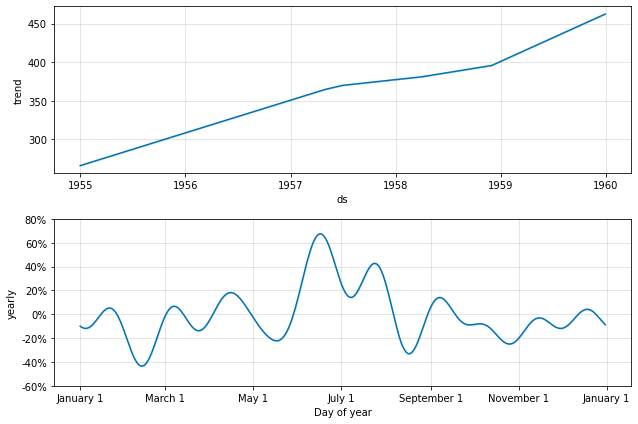

In [8]:
fig2 = m.plot_components(forecast)

In [6]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
1255,2020-06-09,3346.134601,2408.854147,4286.138598
1256,2020-06-10,3359.440937,2411.277508,4332.589869
1257,2020-06-11,3324.709157,2320.396130,4322.082003
1258,2020-06-12,3230.849155,2244.522225,4182.954501
1259,2020-06-13,2877.887392,1963.635410,3857.691748


In [7]:
Forecast = forecast[['ds', 'yhat']].tail(30)
Forecast[(Forecast['yhat'] >= 0) & (Forecast['yhat'] < 10)]

,ds,yhat


<AxesSubplot:xlabel='ds'>

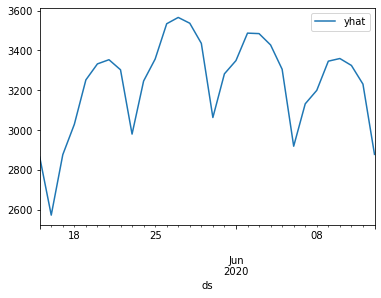

In [8]:
Forecast.plot(x='ds', y='yhat')

In [9]:
file2 = 'Olymp_Prophet_Forecast_'+str(number)+'.csv'
Forecast.to_csv(file2,index=False)